# Color Space Conversion

This example showcases different color space conversion operations available in DALI.

In [1]:
from pathlib import Path

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import nvidia.dali.experimental.dynamic as ndd
import nvidia.dali.types as types

image_dir = Path("../../data/images")
image_path = next(image_dir.glob("**/*.jpg"))
image = ndd.imread(image_path)

## Color Space Conversions

We'll demonstrate three common color space conversions:
- RGB to BGR
- RGB to YCbCr
- RGB to Grayscale

In [2]:
conversions = [
    ("RGB to BGR", types.RGB, types.BGR),
    ("RGB to YCbCR", types.RGB, types.YCbCr),
    ("RGB to Gray", types.RGB, types.GRAY),
]

In [3]:
def show_images(
    original: ndd.Tensor,
    converted_list: list[ndd.Tensor],
    titles: list[str],
    device: str,
):
    fig = plt.figure(figsize=(16, 8))
    columns = 4
    rows = 1
    gs = gridspec.GridSpec(rows, columns)

    plt.subplot(gs[0])
    plt.axis("off")
    plt.title("Original")
    plt.imshow(original.cpu())

    for i, (conv, title) in enumerate(zip(converted_list, titles)):
        plt.subplot(gs[i + 1])
        plt.axis("off")
        plt.title(f"{title} ({device})")
        img = np.asarray(conv.cpu())
        if len(img.shape) == 2 or img.shape[2] == 1:
            plt.imshow(
                np.squeeze(img) if len(img.shape) > 2 else img, cmap="gray"
            )
        else:
            plt.imshow(img)

## CPU Color Conversions

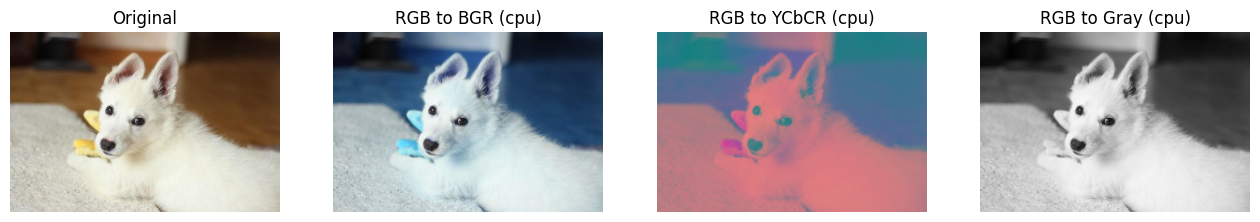

In [4]:
titles = [title for title, _, _ in conversions]
converted_cpu = [
    ndd.color_space_conversion(image, image_type=inp_t, output_type=out_t)
    for _, inp_t, out_t in conversions
]
show_images(image, converted_cpu, titles, "cpu")

## GPU Color Conversions

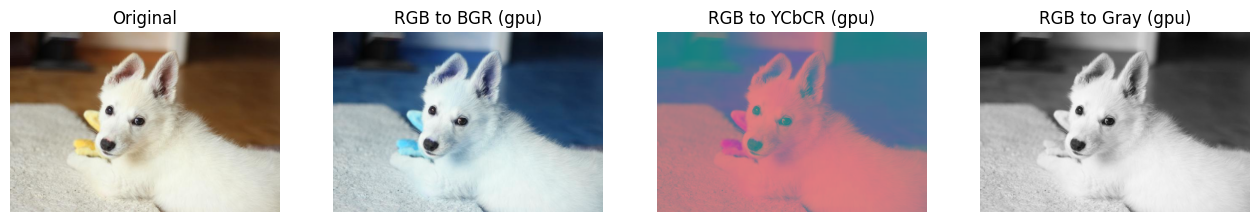

In [5]:
image_gpu = image.gpu()
converted_gpu = [
    ndd.color_space_conversion(image_gpu, image_type=inp_t, output_type=out_t)
    for _, inp_t, out_t in conversions
]
show_images(image_gpu, converted_gpu, titles, "gpu")